In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import random
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy,sparse_categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [70]:
CPU=tf.config.experimental.list_physical_devices("CPU") #check how many cpus the system has
len(CPU)

1

In [71]:
GPU=tf.config.experimental.list_physical_devices("GPU")
len(GPU)

0

Necessary imports

In [17]:
os.chdir("C:/Users/vagelis/Desktop/cancer/Data")

In [2]:
train_path="C:/Users/vagelis/Desktop/cancer/Data/train"
valid_path="C:/Users/vagelis/Desktop/cancer/Data/valid"
test_path="C:/Users/vagelis/Desktop/cancer/Data/test" 

In [3]:
train_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(224, 224),
    batch_size=32
)

Found 581 files belonging to 4 classes.


In [63]:
valid_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    valid_path,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 191 files belonging to 4 classes.


In [64]:
base_model.fit(x=train_dataset,validation_data=valid_dataset,epochs=10,verbose=2)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

In [140]:
class_names

['Adenocarcinoma', 'Largecell_carcinoma', 'Normal', 'Squamouscell_carcinoma']

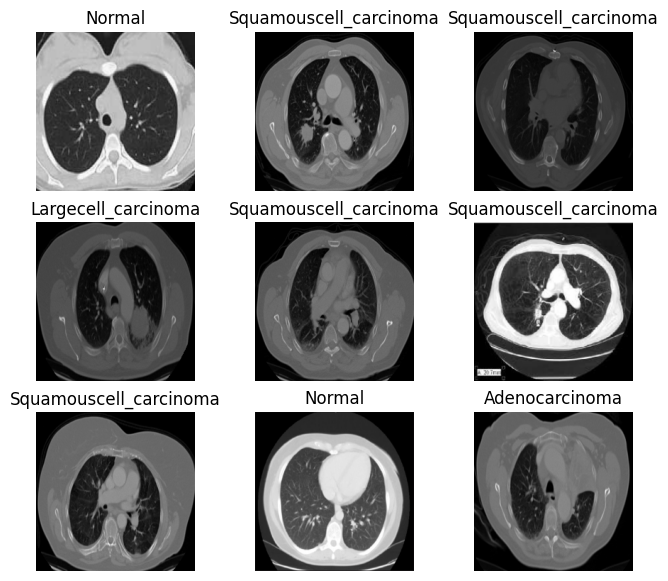

In [44]:
class_names = train_dataset.class_names
plt.figure(figsize=(8, 7))
for images, labels in train_dataset.take(1):  # Take 1 batch
    for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))  # Converts tensor to image
            plt.title(class_names[labels[i]])
            plt.axis("off")
plt.show()

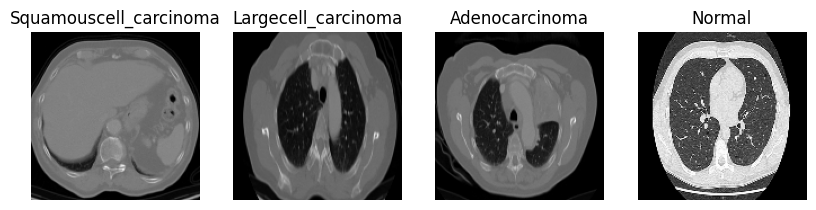

In [142]:
images_per_class = {}

# Extract one image per class
for images, labels in dataset:
    for img, label in zip(images, labels.numpy()):
        class_name = class_names[label]
        if class_name not in images_per_class:  # Store the first occurrence only
            images_per_class[class_name] = img
        if len(images_per_class) == len(class_names):  # Stop when all classes are found
            break
    if len(images_per_class) == len(class_names):
        break

# Plot one image per class
plt.figure(figsize=(10, 5))
for i, (class_name, img) in enumerate(images_per_class.items()):
    ax = plt.subplot(1, len(class_names), i + 1)
    plt.imshow(img.numpy().astype("uint8"))  # Convert tensor to image
    plt.title(class_name)
    plt.axis("off")

plt.show() #1 Image per class

Full path for training,testing and validation sets

In [19]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), classes=['Adenocarcinoma', 'Largecell_carcinoma',"Normal","Squamouscell_carcinoma"], batch_size=10)

Found 581 images belonging to 4 classes.


In [20]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), classes=['Adenocarcinoma', 'Largecell_carcinoma',"Normal","Squamouscell_carcinoma"], batch_size=10)

Found 191 images belonging to 4 classes.


In [21]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), classes=['Adenocarcinoma', 'Largecell_carcinoma',"Normal","Squamouscell_carcinoma"], batch_size=10)

Found 212 images belonging to 4 classes.


Classes must have the same names with the files

In [8]:
assert (train_batches.n==613)
assert (valid_batches.n==72)
assert (test_batches.n==299)

We check if this conditions are True and then procceed to the code below

In [22]:
img_train,labels_train=next(train_batches)
img_valid,labels_valid=next(valid_batches)
img_test,labels_test=next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

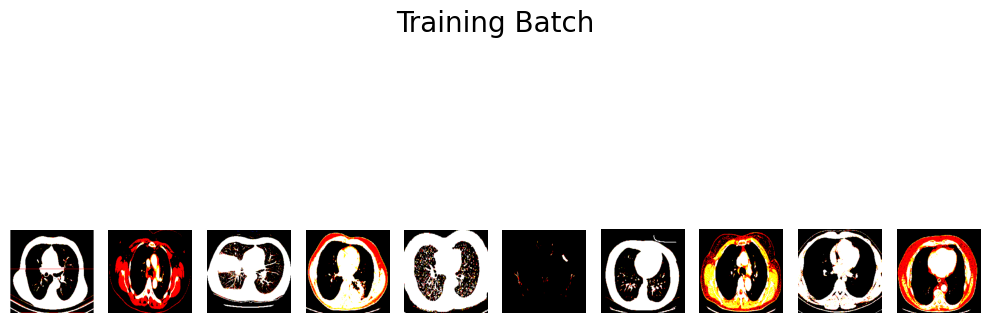

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

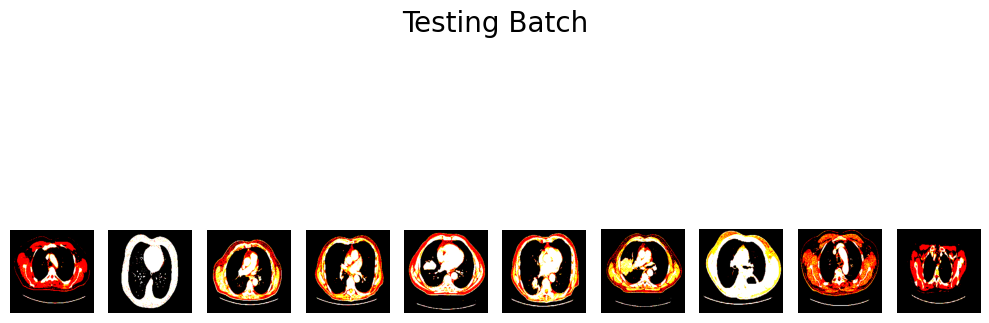

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

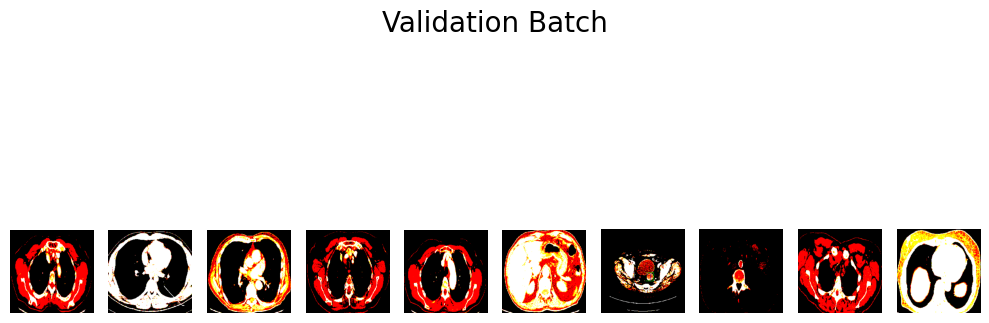

In [15]:
def plot_images(image_arr,subtitle):
    fig, axes = plt.subplots(1, 10, figsize=(10,5))
    fig.suptitle(subtitle, fontsize=20)
    axes=axes.flatten()
    for img, ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
plot_images(img_train,"Training Batch")
plot_images(img_test,"Testing Batch")
plot_images(img_valid,"Validation Batch")

The color data is skewd because of preprocessing VGG16 function

In [12]:
print(labels_train)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [13]:
print(labels_test)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [14]:
print(labels_valid)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


One hot encoded labels so we use Categorical Crossentropy

In [15]:
train_min, train_max =img_train.min(), img_train.max()
print(f" The range in Training is {train_min}-{train_max}")

 The range in Training is -123.68000030517578-151.06100463867188


In [16]:
img_train.shape

(10, 224, 224, 3)

In [17]:
import keras_tuner as kt

In [54]:
def build_model(hp): #define function
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=5, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [55]:
random_search_tuner = kt.RandomSearch( #select search algorithm
    build_model, objective="val_accuracy", max_trials=5, overwrite=True, seed=42)


In [56]:
random_search_tuner.search(img_train,np.argmax(labels_train,axis=1),epochs=10,
                           validation_data=(img_valid,np.argmax(labels_valid,axis=1)))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.6000000238418579

Best val_accuracy So Far: 0.699999988079071
Total elapsed time: 00h 00m 34s


we used only the first 10 features for the tuner with 1,2,3,4 labels not one hot encoded to get an idea of the model

In [57]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0];best_model

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [58]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=5);best_trial

In [65]:
best_trial[0].summary()

Trial 2 summary
Hyperparameters:
n_hidden: 2
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.699999988079071


""


Build the basic model

In [24]:
img_train.shape

(10, 224, 224, 3)

10 → Number of images (batch size).
224 → Height of each image (in pixels).
224 → Width of each image (in pixels).
3 → Number of color channels (RGB → Red, Green, Blue).

In [23]:
tf.random.set_seed(42)
base_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')
])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
base_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         802,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,212 (3.14 MB)

 Trainable params: 822,212 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
base_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history1=base_model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
59/59 - 24s - 400ms/step - accuracy: 0.5456 - loss: 49.4742 - val_accuracy: 0.4817 - val_loss: 26.8588
Epoch 2/10
59/59 - 13s - 213ms/step - accuracy: 0.7814 - loss: 4.1806 - val_accuracy: 0.5131 - val_loss: 21.0028
Epoch 3/10
59/59 - 13s - 221ms/step - accuracy: 0.8124 - loss: 3.6913 - val_accuracy: 0.5131 - val_loss: 18.2384
Epoch 4/10
59/59 - 13s - 224ms/step - accuracy: 0.9277 - loss: 0.8394 - val_accuracy: 0.4555 - val_loss: 18.3573
Epoch 5/10
59/59 - 13s - 226ms/step - accuracy: 0.9535 - loss: 0.1899 - val_accuracy: 0.5916 - val_loss: 12.9460
Epoch 6/10
59/59 - 14s - 239ms/step - accuracy: 0.9880 - loss: 0.0521 - val_accuracy: 0.5759 - val_loss: 12.6321
Epoch 7/10
59/59 - 14s - 238ms/step - accuracy: 0.9983 - loss: 0.0070 - val_accuracy: 0.5288 - val_loss: 14.3184
Epoch 8/10
59/59 - 14s - 230ms/step - accuracy: 0.9862 - loss: 0.0910 - val_accuracy: 0.5393 - val_loss: 14.8754
Epoch 9/10
59/59 - 12s - 210ms/step - accuracy: 0.9880 - loss: 0.0236 - val_accuracy: 0.5288 - 

In [85]:
best_epoch_base = np.argmin(history1.history['val_loss']);best_epoch_base

7

<Figure size 3000x1500 with 0 Axes>

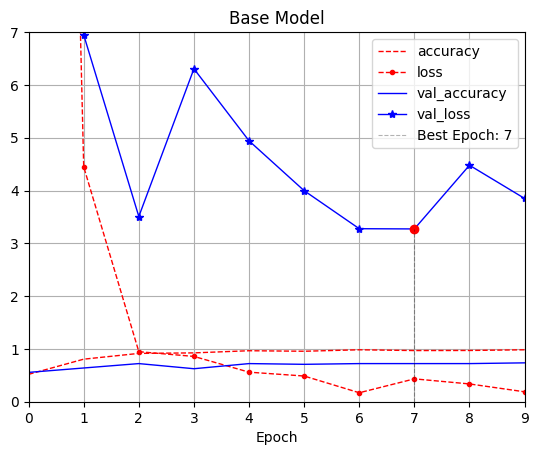

In [95]:
plt.figure(figsize=(30,15))
pd.DataFrame(history1.history).plot( xlim=[0, 9], ylim=[0, 7], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.plot(best_epoch_base,min(history1.history["val_loss"]),"ro")
plt.vlines(best_epoch_base,0,min(history1.history['val_loss']), linestyle="--", color="black", label=f"Best Epoch: {best_epoch_base}",linewidth=0.8,alpha=0.3)
plt.legend(loc="upper right") 
plt.title("Base Model")
plt.show()

As we can see our model slightly overfits because training accuracy hits 98% while validation accuracy hits arround 74%

Lets make some predictions

In [ ]:
img_test,labels_test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

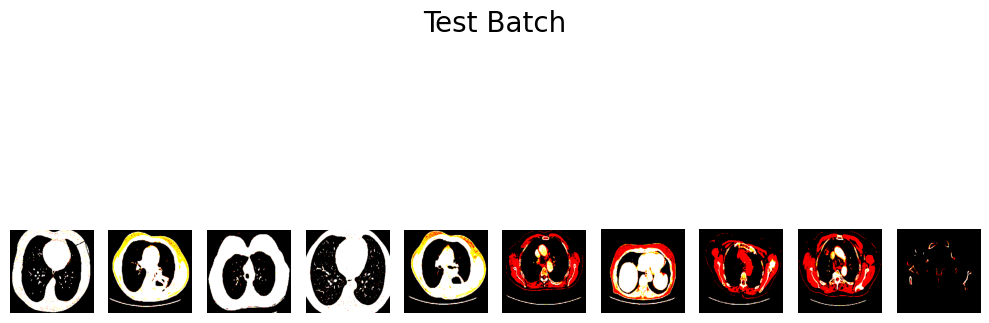

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [130]:
plot_images(img_test,"Test Batch")
print(labels_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

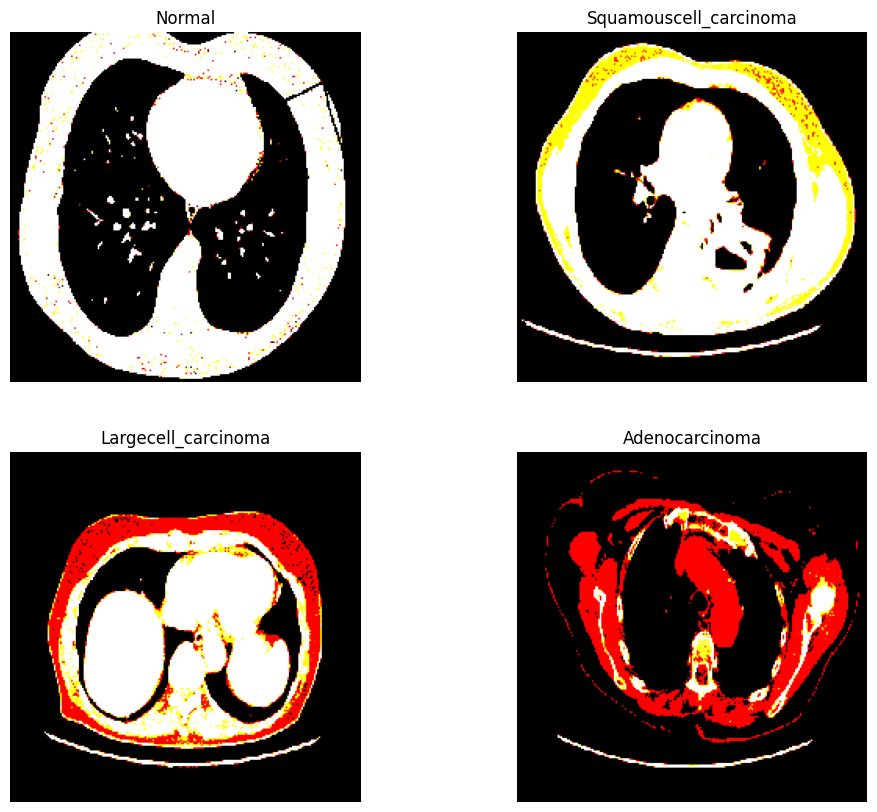

In [161]:
fig,axs=plt.subplots(2,2,figsize=(8,10))
fig.set_size_inches(12,10)
axs[0,0].imshow(img_test[0])
axs[0,0].set_title('Normal')
axs[0,0].axis("off")
axs[0,1].imshow(img_test[1])
axs[0,1].set_title('Squamouscell_carcinoma')
axs[0,1].axis("off")
axs[1,0].imshow(img_test[6])
axs[1,0].set_title('Largecell_carcinoma')
axs[1,0].axis("off")
axs[1,1].imshow(img_test[7])
axs[1,1].set_title('Adenocarcinoma')
axs[1,1].axis("off")

In [131]:
for arg in range(0,len(labels_test)):
    if np.argmax(labels_test[arg])==0:
        print(f"{labels_test[arg]}-Adenocarcinoma")
    elif np.argmax(labels_test[arg])==1:
        print(f"{labels_test[arg]}-Largecell_carcinoma")
    elif np.argmax(labels_test[arg])==2:
        print(f"{labels_test[arg]}-Normal")
    else:
        print(f"{labels_test[arg]}-Squamouscell_carcinoma")

[0. 0. 1. 0.]-Normal
[0. 0. 0. 1.]-Squamouscell_carcinoma
[0. 0. 1. 0.]-Normal
[0. 0. 1. 0.]-Normal
[0. 0. 0. 1.]-Squamouscell_carcinoma
[0. 0. 0. 1.]-Squamouscell_carcinoma
[0. 1. 0. 0.]-Largecell_carcinoma
[1. 0. 0. 0.]-Adenocarcinoma
[0. 0. 0. 1.]-Squamouscell_carcinoma
[1. 0. 0. 0.]-Adenocarcinoma


'Adenocarcinoma'=0, 'Largecell_carcinoma'=1,"Normal"=2,"Squamouscell_carcinoma"=3

In [132]:
np.argmax(labels_test,axis=1)[0]

2

In [133]:
test_batches.classes #actual classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [181]:
d1=dict(round(pd.DataFrame(test_batches.classes).value_counts()/test_batches.classes.shape[0],2)*100);d1 
#percentages of each class for test batches

{(0,): 35.0, (3,): 30.0, (2,): 18.0, (1,): 17.0}

In [171]:
test_batches.classes.shape[0]

299

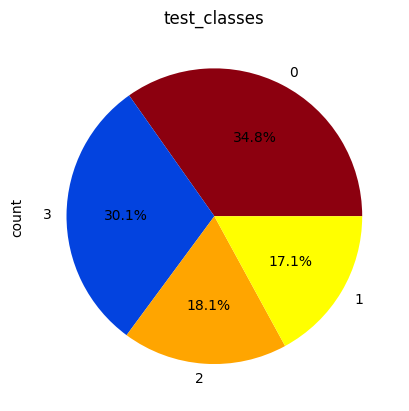

In [17]:
colors=["#8C000F","#0343DF","#FFA500","#FFFF00"]
pie_test=pd.DataFrame(test_batches.classes).value_counts().plot(kind="pie",title="test_classes",autopct='%1.1f%%',colors=colors,labels=[0,3,2,1])

Predictions

In [21]:
predictions=base_model.predict(x=test_batches,verbose=1)

NameError: name 'base_model' is not defined

In [136]:
np.round(predictions)[:10] #predicted classes one hot encoded first 10

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [187]:
pred_classes=np.argmax(predictions,axis=1);pred_classes #and with argmax

array([1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 3, 1, 2, 3, 3, 2, 2, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 1, 3, 0, 1, 3, 1, 1, 2, 3, 0, 1, 1, 2, 1, 0, 1,
       1, 3, 1, 2, 3, 1, 3, 3, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1, 0, 2,
       3, 0, 3, 0, 2, 2, 1, 1, 2, 1, 1, 3, 1, 0, 2, 1, 2, 1, 3, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 3, 0, 0, 1, 2, 0, 1,
       0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 3, 1, 3, 1, 3,
       1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 3, 3, 0, 1, 1, 3, 3, 1, 3,
       1, 1, 3, 1, 3, 0, 0, 2, 2, 0, 3, 1, 3, 2, 1, 2, 1, 1, 2, 0, 2, 2,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 3, 0, 3, 1,
       1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 0, 1, 3, 1, 0, 2, 2, 3, 1, 3, 1, 1,
       1, 1, 0, 0, 2, 3, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 3, 1, 1], dtyp

In [189]:
d2=dict(round(pd.DataFrame(pred_classes).value_counts()/pred_classes.shape[0],2)*100);d2
#percentages of each class for test batches

{(1,): 50.0, (2,): 19.0, (3,): 17.0, (0,): 15.0}

In [192]:
print(d1)
print(d2)

{(0,): 35.0, (3,): 30.0, (2,): 18.0, (1,): 17.0}
{(1,): 50.0, (2,): 19.0, (3,): 17.0, (0,): 15.0}


In [183]:
pred_classes.shape[0]

299

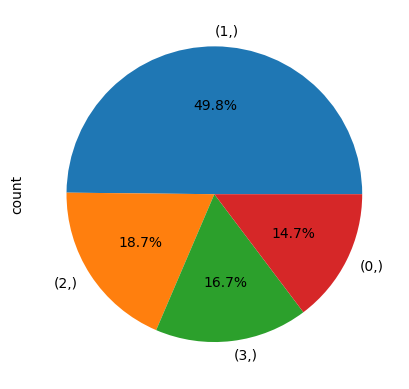

In [195]:
pie_predict=pd.DataFrame(pred_classes).value_counts().plot(kind="pie",autopct='%1.1f%%')

<Axes: title={'center': 'prediction_classe'}, ylabel='count'>

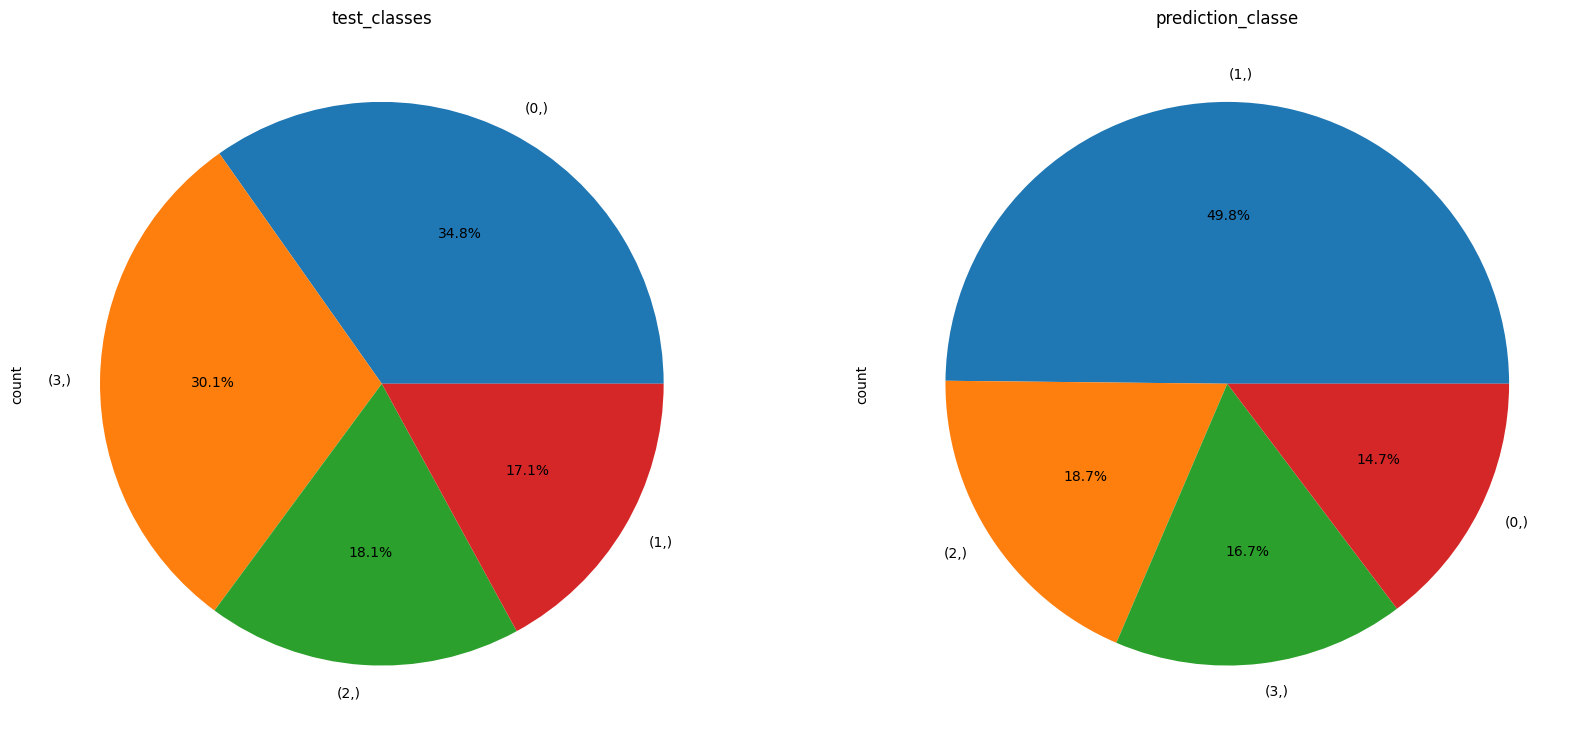

In [200]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches(20, 10)
pd.DataFrame(test_batches.classes).value_counts().plot(kind="pie",title="test_classes",autopct='%1.1f%%',ax=axs[0])
pd.DataFrame(pred_classes).value_counts().plot(kind="pie",autopct='%1.1f%%',ax=axs[1],title="prediction_classe")

In [202]:
if os.path.isfile('cancer/h1.h5') is False:
    base_model.save('cancer/h1.h5')

Save the model for future usage

In [18]:
from tensorflow.keras.models import load_model
base_model_loaded = load_model('cancer/h1.h5')

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1)

In [213]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict:0', 'Predict:1','Predict:2','Predict:3'], 
                                 index=['Actual:0', 'Actual:1','Actual:2','Actual:3'])

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Predict:0'),
  Text(1.5, 0, 'Predict:1'),
  Text(2.5, 0, 'Predict:2'),
  Text(3.5, 0, 'Predict:3')])

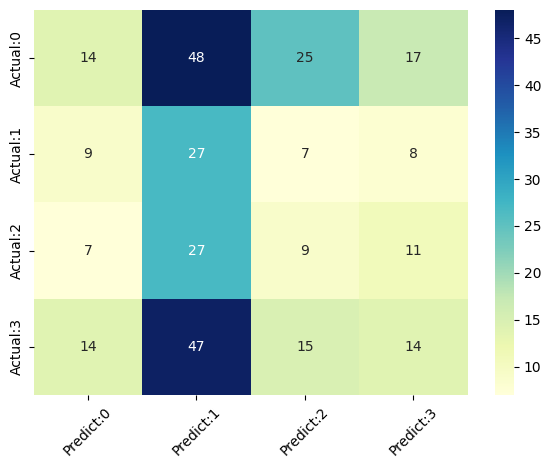

In [219]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45)

In [146]:
test_batches.class_indices

{'Adenocarcinoma': 0,
 'Largecell_carcinoma': 1,
 'Normal': 2,
 'Squamouscell_carcinoma': 3}

As we can see also from confusion matrix our model doesnot perform well on unseen data we will try to improve its performance with different methods.

We will try to improve it by adding batch normalization, Dropout layers and earlystopping trying to prevent overfitting

In [19]:
from tensorflow.keras.layers import Dropout

In [26]:
improved_model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32,activation='relu'),
    Dense(units=4, activation='softmax')
])

In [28]:
improved_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,0

 Total params: 12,950,692 (49.40 MB)

 Trainable params: 12,949,796 (49.40 MB)

 Non-trainable params: 896 (3.50 KB)

We added one more convolution layers with three more dense layers. 

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
callback=EarlyStopping(patience=5,monitor="val_loss")

In [32]:
improved_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
update_history=improved_model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2,callbacks=[callback])

Epoch 1/10
59/59 - 26s - 440ms/step - accuracy: 0.9398 - loss: 0.1735 - val_accuracy: 0.4764 - val_loss: 3.0980
Epoch 2/10
59/59 - 23s - 388ms/step - accuracy: 0.9707 - loss: 0.0773 - val_accuracy: 0.6073 - val_loss: 1.8786
Epoch 3/10
59/59 - 24s - 400ms/step - accuracy: 0.9966 - loss: 0.0332 - val_accuracy: 0.5707 - val_loss: 2.9470
Epoch 4/10
59/59 - 25s - 418ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.5602 - val_loss: 3.6863
Epoch 5/10
59/59 - 25s - 417ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.5602 - val_loss: 3.3262
Epoch 6/10
59/59 - 24s - 411ms/step - accuracy: 1.0000 - loss: 9.7262e-04 - val_accuracy: 0.5602 - val_loss: 3.5801
Epoch 7/10
59/59 - 24s - 409ms/step - accuracy: 1.0000 - loss: 6.9789e-04 - val_accuracy: 0.5550 - val_loss: 3.6511


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


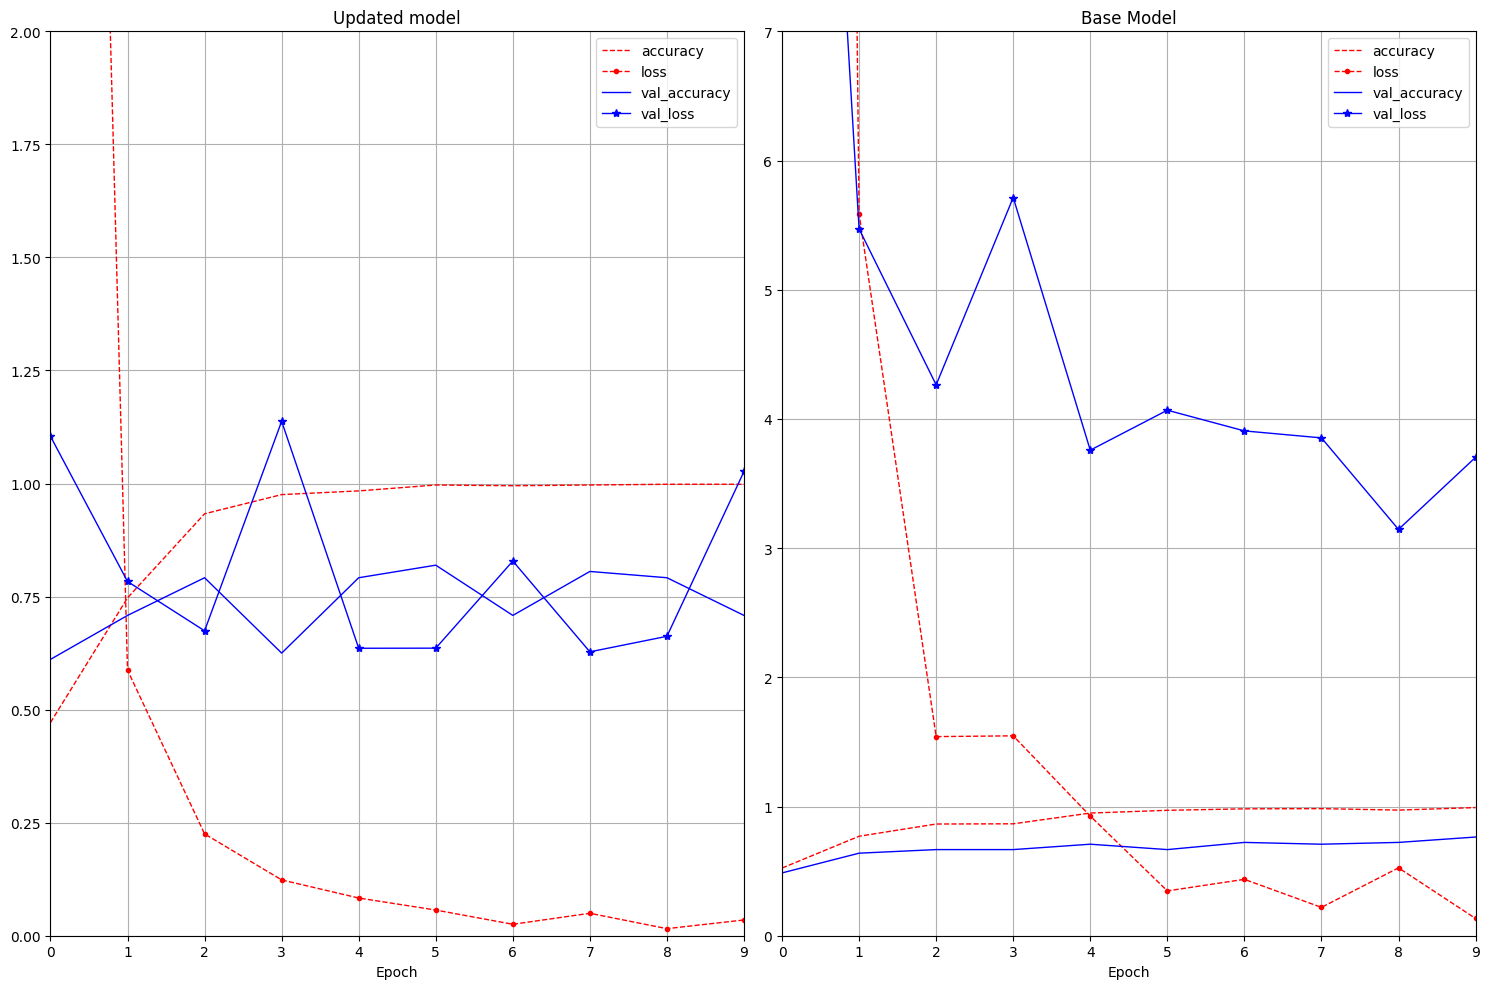

In [66]:

fig,axs=plt.subplots(1,2)
fig.set_size_inches(15, 10)

pd.DataFrame(update_history.history).plot( xlim=[0, 9], ylim=[0, 2], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1,ax=axs[0],title="Updated model")
plt.legend(loc="upper right") 


pd.DataFrame(history1.history).plot( xlim=[0, 9], ylim=[0, 7], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1,ax=axs[1])
#plt.plot(best_epoch_base,min(history1.history["val_loss"]),"ro")
#plt.vlines(best_epoch_base,0,min(history1.history['val_loss']), linestyle="--", color="black", label=f"Best Epoch: {best_epoch_base}",linewidth=0.8,alpha=0.3)
plt.legend(loc="upper right") 
plt.title("Base Model")
plt.tight_layout()

plt.show()


Not much improving compared to our base model Validation accuracy arroung the same levels.

## We will use VGG16 model trying to improve our performance

In [67]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 379s 1us/step


In [68]:
type(vgg16_model)

keras.src.models.functional.Functional

In [69]:
vgg16_model.summary() #functional API transform it into sequential

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model=Sequential()

In [73]:
for layer in vgg16_model.layers[:-1]:
    model.add(layer) #create sequential model with all layers

In [145]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
for layer in model.layers:
    layer.trainable=False #for not training the model again because vgg16 is aldready trained

In [148]:
model.add(Dense(units=4,activation="softmax")) #add last layer

In [149]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 16,388 (64.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

Trainable params: 16,388 (64.02 KB) Only that will be trained

In [153]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [156]:
vgg16_history=model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
62/62 - 543s - 9s/step - accuracy: 0.9217 - loss: 0.3054 - val_accuracy: 0.6389 - val_loss: 0.7431
Epoch 2/5
62/62 - 433s - 7s/step - accuracy: 0.9445 - loss: 0.2784 - val_accuracy: 0.6944 - val_loss: 0.7550
Epoch 3/5
62/62 - 449s - 7s/step - accuracy: 0.9233 - loss: 0.2789 - val_accuracy: 0.6667 - val_loss: 0.7062
Epoch 4/5
62/62 - 523s - 8s/step - accuracy: 0.9462 - loss: 0.2511 - val_accuracy: 0.6667 - val_loss: 0.6914
Epoch 5/5
62/62 - 439s - 7s/step - accuracy: 0.9478 - loss: 0.2400 - val_accuracy: 0.6528 - val_loss: 0.6786


In [157]:
if os.path.isfile('cancer/h2.h5') is False:
       model.save('cancer/h2.h5')

In [9]:
from tensorflow.keras.models import load_model
model1= load_model('cancer/h2.h5')

In [10]:
model1.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [37]:
vgg_predictions=model1.predict(x=test_batches,verbose=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step 


In [12]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Predict:0'),
  Text(1.5, 0, 'Predict:1'),
  Text(2.5, 0, 'Predict:2'),
  Text(3.5, 0, 'Predict:3')])

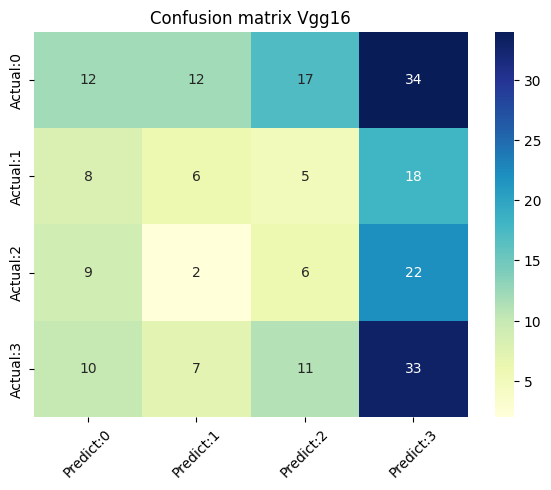

In [39]:
cm_vgg=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(vgg_predictions,axis=-1))
cm_matrix_vgg = pd.DataFrame(data=cm_vgg, columns=['Predict:0', 'Predict:1','Predict:2','Predict:3'], 
                                 index=['Actual:0', 'Actual:1','Actual:2','Actual:3'])

plt.figure(figsize=(7,5))
ax=sns.heatmap(cm_matrix_vgg, annot=True, fmt='d', cmap='YlGnBu')
ax.set_title("Confusion matrix Vgg16")
plt.xticks(rotation=45)